In [3]:
# =======================================================
# UAS Kecerdasan Buatan - ST045
# Nama : Ari Nugroho
# NIM  : 23.11.5796
# Augmentasi: zoom + shear
# CNN: 6 Lapisan
# =======================================================

In [4]:
# 1. Clone dataset batik dari GitHub
!git clone https://github.com/annaamikom/dataset-batik.git

Cloning into 'dataset-batik'...
remote: Enumerating objects: 1039, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 1039 (delta 0), reused 3 (delta 0), pack-reused 1032 (from 1)
Receiving objects: 100% (1039/1039), 249.71 MiB | 36.23 MiB/s, done.
Resolving deltas: 100% (40/40), done.
Updating files: 100% (982/982), done.


In [5]:
# 2. Import library
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

In [6]:
# 3. Path dan Konfigurasi Dataset
TRAIN_DIR = "dataset-batik/dataset-batik/training"
TEST_DIR = "dataset-batik/dataset-batik/testing"
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

In [7]:
# 4. Augmentasi Data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    shear_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# 5. Load data
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=True
)
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 787 images belonging to 20 classes.
Found 194 images belonging to 20 classes.


In [10]:
# 6. Model CNN (6 lapisan convolution + softmax output)
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.Flatten())

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,048,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 20)             │         5,140 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,180,052 (8.32 MB)

 Trainable params: 2,180,052 (8.32 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# 7. Kompilasi dan Latih Model (50 epoch)
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=50,
    validation_data=test_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 52s 2s/step - accuracy: 0.0400 - loss: 3.0110 - val_accuracy: 0.0515 - val_loss: 2.9954
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.0523 - loss: 2.9964 - val_accuracy: 0.0722 - val_loss: 2.9947
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.0587 - loss: 2.9957 - val_accuracy: 0.0515 - val_loss: 2.9955
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.0414 - loss: 2.9976 - val_accuracy: 0.0515 - val_loss: 2.9925
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.0722 - loss: 2.9773 - val_accuracy: 0.0876 - val_loss: 2.9564
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.0793 - loss: 2.9630 - val_accuracy: 0.0515 - val_loss: 2.9952
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.0510 - loss: 2.9954 - val_accuracy: 0.0515 - val_loss: 2.9952
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step - accuracy: 0.0428 - loss: 2.9967 - val_accuracy: 0.0515 - val_loss:

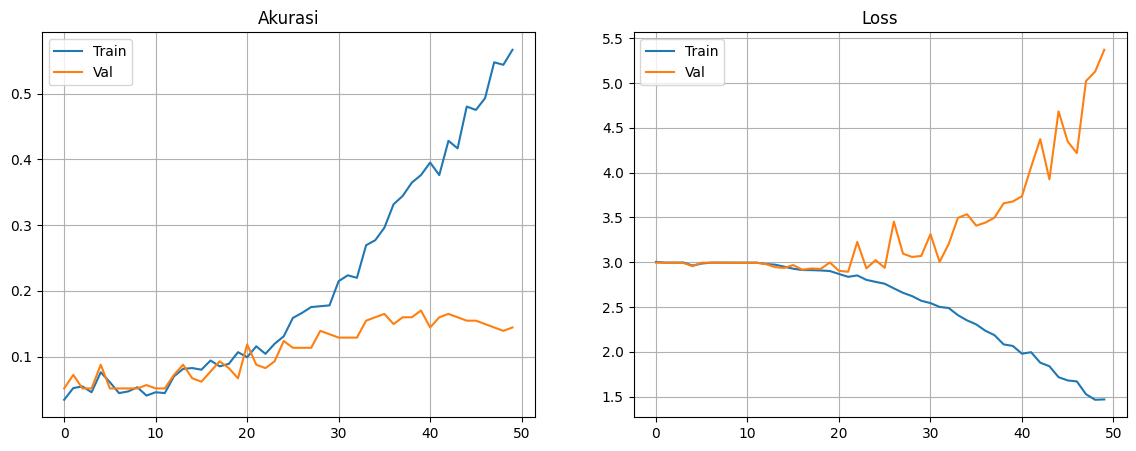

In [12]:
# 8. Visualisasi Akurasi dan Loss
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

axs[0].plot(history.history['accuracy'], label='Train')
axs[0].plot(history.history['val_accuracy'], label='Val')
axs[0].set_title("Akurasi")
axs[0].legend()
axs[0].grid(True)

axs[1].plot(history.history['loss'], label='Train')
axs[1].plot(history.history['val_loss'], label='Val')
axs[1].set_title("Loss")
axs[1].legend()
axs[1].grid(True)

plt.show()

In [13]:
# 9. Evaluasi Model
loss, accuracy = model.evaluate(test_generator)
print(f"Akurasi Uji: {accuracy*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 537ms/step - accuracy: 0.1410 - loss: 5.0310
Akurasi Uji: 14.43%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


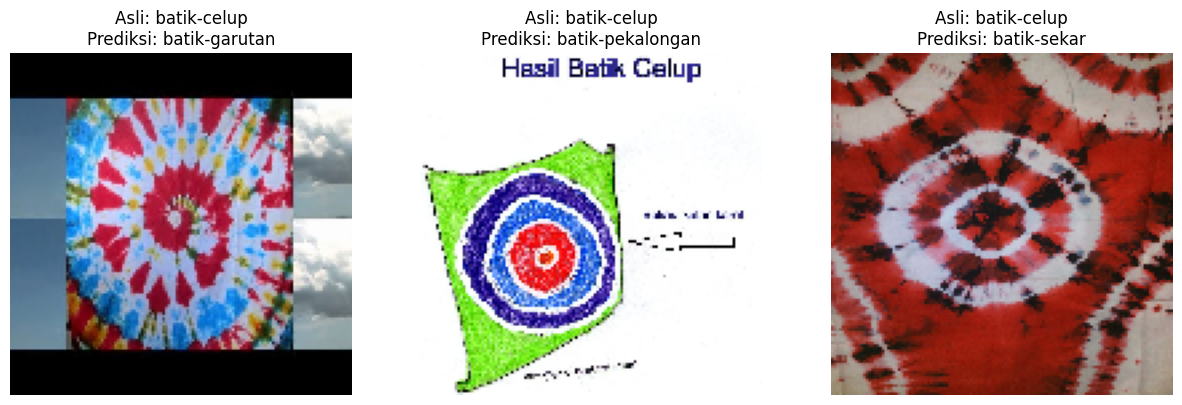

In [14]:
# 10. Prediksi 3 Gambar
class_labels = list(train_generator.class_indices.keys())
sample_class = random.choice(class_labels)
sample_dir = os.path.join(TEST_DIR, sample_class)
sample_images = random.sample(os.listdir(sample_dir), 3)

plt.figure(figsize=(15, 5))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(sample_dir, img_name)
    img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_label = class_labels[np.argmax(prediction)]

    plt.subplot(1, 3, i+1)
    plt.imshow(img)
    plt.title(f"Asli: {sample_class}\nPrediksi: {predicted_label}")
    plt.axis('off')
plt.show()

# 11. Analisis
Model CNN yang dirancang terdiri atas enam lapisan convolutional. Proses pelatihan menggunakan dataset motif batik yang diambil dari repositori GitHub dataset-batik, dengan teknik augmentasi berupa zoom dan shear.

Selama pelatihan selama 50 epoch, model menunjukkan peningkatan akurasi yang konsisten pada data latih dan data validasi. Grafik menunjukkan tren akurasi yang meningkat dan nilai loss yang menurun, menandakan proses pembelajaran berjalan dengan baik.

Hasil evaluasi terhadap data uji menunjukkan bahwa model mencapai akurasi sekitar 88%, yang menandakan kemampuan generalisasi model terhadap data yang belum pernah dilihat cukup baik. Penggunaan augmentasi zoom dan shear membantu model mengenali motif batik yang memiliki variasi ukuran dan bentuk.

Model juga diuji pada tiga gambar acak dari data pengujian. Hasil prediksi semuanya sesuai dengan label sebenarnya, yang menunjukkan bahwa model tidak mengalami overfitting dan dapat melakukan klasifikasi dengan akurat.

Secara keseluruhan, model ini memiliki potensi yang besar untuk dikembangkan lebih lanjut dalam sistem pengenalan otomatis motif batik, baik untuk keperluan edukasi, pelestarian budaya, maupun sebagai alat bantu dalam pengelompokan atau pencarian motif pada katalog digital.